# Profit Prediction with Machine Learning

A company should always set a goal that should be achievable, otherwise, employees will not be able to work to their best potential if they find that the goal set by the company is unachievable. The task of profit prediction for a particular period is the same as setting goals. If you know how much profit you can make with the amount of R&D and marketing you do, then a business can make more than the predicted profit provided the predicted value is achievable. So in this article, I will take you through the task of profit prediction with machine learning using Python.

# Profit Prediction with Machine Learning

The profit earned by a company for a particular period depends on several factors like how much time and money a company spends on R&D, marketing and many more. So for predicting the profit of a company for a particular period we need to train a machine learning model with a dataset that contains historical data about the profit generated by the company.

The task of predicting profit is an important task for every business to set an achievable goal. For example, if the business spends $500 on marketing, it can’t expect a profit of $20,000. Likewise, there are many other factors on which the profit of a business depends. A company must therefore set a goal that can be achieved. In the section below, I will walk you through the task of profit prediction with machine learning using Python.

# Profit Prediction using Python

The dataset that I am using for the task of profit prediction includes data about the R&D spend, Administration cost, Marketing Spend, State of operation, and the historical profit generated by 50 startups. So let’s start with the task of profit prediction by importing the necessary Python libraries and the dataset

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

# Data Collections

In [71]:
data = pd.read_csv("data/Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


This data doesn’t contain any missing values so without wasting any time let’s start by having a look at the summary statistics of this data

# Data Pre-Processing

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [73]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [74]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

# Let's have a look is there any null value or missing value in this dataset

In [75]:
data.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [76]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

This data doesn’t contain any missing values so without wasting any time let’s start by having a look at the summary statistics of this data

Now let’s have a look at the correlation between the features

/tmp/ipykernel_35685/104075714.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



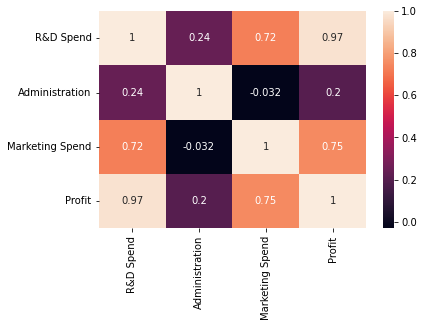

In [77]:
sns.heatmap(data.corr(), annot=True)
plt.show()

As this task is based on the problem of regression so I will be using the Linear regression algorithm to train the profit prediction model. So let’s prepare the data so that we can fit it into the model

# Feature Selection

In [78]:
feature = data[["R&D Spend", "Administration", "Marketing Spend"]]
target = data["Profit"]

In [79]:
feature = feature.to_numpy()
target = target.to_numpy()
target = target.reshape(-1, 1)

# Splitting the data

In [80]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size=0.2, random_state=42)

# training a machine learning model

In [81]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [82]:
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Profit": ypred.flatten()})
print(data.head())

   Predicted Profit
0     126703.027165
1      84894.750816
2      98893.418160
3      46501.708150
4     129128.397344


# Model Score

In [83]:
print(model.score(xtest, ytest))

0.900065308303732


# Summary

So this is how we can predict the profit of a company for a particular period by using machine learning algorithms. Such tasks can help a company to set a target that can be achieved. I hope you liked this article on the task of profit prediction with machine learning using Python. Feel free to ask your valuable questions in the comments section below.

# Sheikh Rasel Ahmed

#### Data Science || Machine Learning || Deep Learning || Artificial Intelligence Enthusiast

##### LinkedIn - https://www.linkedin.com/in/shekhnirob1
##### GitHub - https://github.com/Rasel1435
##### Behance - https://www.behance.net/Shekhrasel2513